# Eficiência Energética em Edificações 
## Uma aplicação de Machine Learning

[building_energy_efficiency.py](./building_energy_efficiency.py): Eficiência energética: Previsão de demanda de energia para aquecimento e resfriamento em edificacoes 

@author: Rejane  
@date	  Setembro 2018  
@version 1.0  

> Objetivo: Avaliar a performance de métodos de previsão por Regressão Linear (incluindo tecnicas de regularizacao Lasso e Ridge), K-Nearest Neighbor e o metodo ensemble Gradient Boosting.  
  

## Importing Libraries

In [1]:
# Importando pacotes
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importando pacotes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Versões dos pacotes instalados na plataforma
print("numpy version: %s" % np.__version__)
print("pandas version: %s" % pd.__version__)
#print("scikit-learn version: %s" % sklearn.__version__)

numpy version: 1.14.3
pandas version: 0.23.0


## Problem description 

A [base de dados](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency) refere-se ao estudo de [Tsanas e Xifara (2012)](http://people.maths.ox.ac.uk/tsanas/Preprints/ENB2012.pdf) , em que foram realizados experimentos usando 12 edifícios de diferentes formas, para avaliação da eficiência energética em edificações como função dos parâmetros de construção. Os edifícios são diferentes no que diz respeito à área de vidros, a distribuição de área envidraçada e a sua orientação, entre outros parâmetros. Várias configurações foram realizadas, como funções das características acima mencionadas para obter 768 formas de construção. O dataset, portanto, é composto por 768 amostras e 8 características, com o objetivo de prever as duas respostas relativas aos requisitos de demanda energética, que são a demanda de energia para aquecimento (‘heating load’) e demanda de energia para resfriamento (‘cooling load’). 

## Loading dataset

In [4]:
# Carrega a base de dados (Referencia https://archive.ics.uci.edu/ml/datasets/Energy+efficiency)
print("Carrega a base de dados: Eficiencia energetica de edificacoes")
data = pd.read_excel('../Dados/ENB2012_data.xlsx')
data.info()

Carrega a base de dados: Eficiencia energetica de edificacoes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [5]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [6]:
data.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


### Descrição do conjunto de dados

O conjunto de dados contem oito atributos (ou 'features', indicados por X1...X8) e duas respostas (ou saídas, indicadas por y1 e y2). 

O objetivo é usar os oito atributos para prever cada uma das duas respostas.

Especificamente: 

- X1	Relative Compactness – Compactação relativa 
- X2	Surface Area – Área de superfície 
- X3	Wall Area –Área de parede 
- X4	Roof Area – Área de Telhado 
- X5	Overall Height – Altura total 
- X6	Orientation – Orientaçao (espacial) 
- X7	Glazing Area – Área envidraçada 
- X8	Glazing Area Distribution – Distribuição da área envidraçada 
- y1	Heating Load – Demanda de energia para aquecimento 
- y2	Cooling Load – Demanda de energia para resfriamento 

## Data Exploration

In [7]:
#Estatistica descritiva
data.describe(include='all')

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


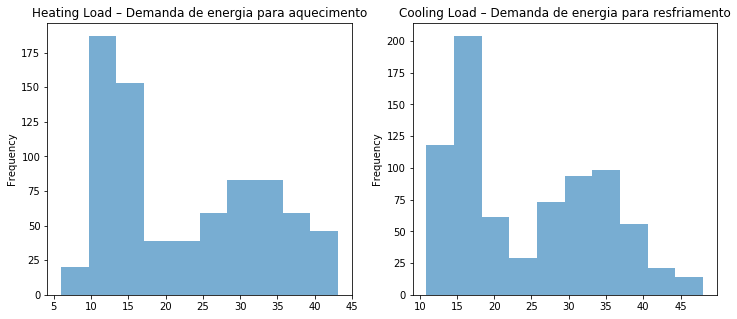

In [8]:
# Visualizacao variaveis target
plt.subplot(121)
data['Y1'].plot.hist(figsize=(12,5), alpha = 0.6, title = 'Heating Load – Demanda de energia para aquecimento')
plt.subplot(122)
data['Y2'].plot.hist(figsize=(12,5), alpha = 0.6, title = 'Cooling Load – Demanda de energia para resfriamento')
plt.show()

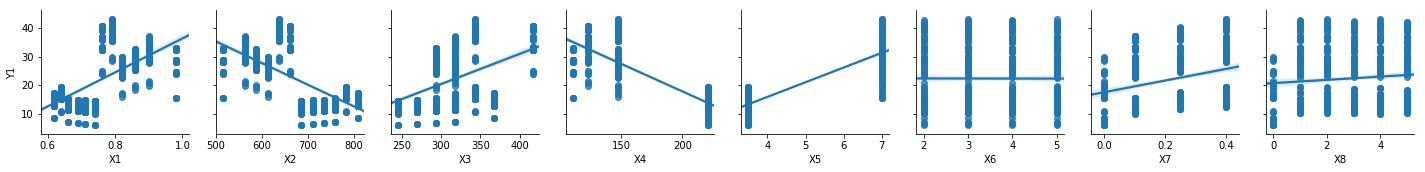

In [9]:
# Visualizacao features e target Y1
sns.pairplot(data, x_vars=['X1', 'X2', 'X3', 'X4','X5', 'X6', 'X7', 'X8'], y_vars=['Y1'], kind="reg")
plt.show()

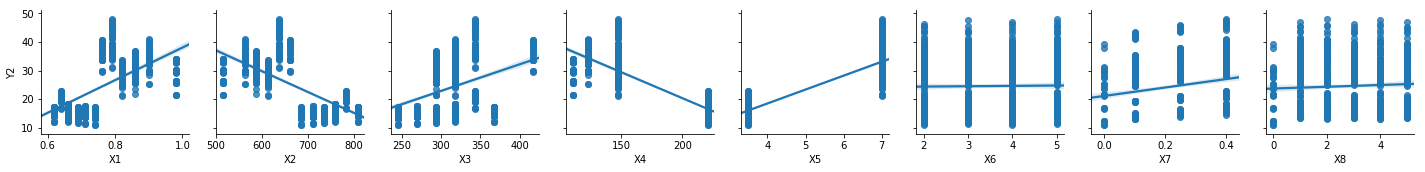

In [10]:
# Visualizacao features e target Y2
sns.pairplot(data, x_vars=['X1', 'X2', 'X3', 'X4','X5', 'X6', 'X7', 'X8'], y_vars=['Y2'], kind="reg")
plt.show()

In [11]:
# Correlacao entre as variaveis
round(data.corr(),3)

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000,-0.992,-0.204,-0.869,0.828,0.000,0.000,0.000,0.622,0.634
X2,-0.992,1.000,0.196,0.881,-0.858,0.000,0.000,-0.000,-0.658,-0.673
X3,-0.204,0.196,1.000,-0.292,0.281,0.000,-0.000,0.000,0.456,0.427
X4,-0.869,0.881,-0.292,1.000,-0.973,0.000,-0.000,-0.000,-0.862,-0.863
X5,0.828,-0.858,0.281,-0.973,1.000,0.000,0.000,0.000,0.889,0.896
X6,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,-0.003,0.014
X7,0.000,0.000,-0.000,-0.000,0.000,0.000,1.000,0.213,0.270,0.208
X8,0.000,-0.000,0.000,-0.000,0.000,0.000,0.213,1.000,0.087,0.051
Y1,0.622,-0.658,0.456,-0.862,0.889,-0.003,0.270,0.087,1.000,0.976
Y2,0.634,-0.673,0.427,-0.863,0.896,0.014,0.208,0.051,0.976,1.000


A estatistica descritiva mostra medias e medianas relativamente proximas. Mas, como o conjunto de dados foi obtido por meio de experimentos, as variaveis relacionadas aos atributos nao possuem distribuicao normal aleatoria, mas possuem valores estabelecidos no planejamento do experimento. As variaveis resposta Y1 e Y2 tampouco possuem distribuicao normal: suas distribuicoes assemelham-se a bimodais (ver histogramas acima). 

O relacionamento entre as variaveis resposta e os atributos parecem seguir um padrao: positivo para os atributos X1, X3, X5 e X7; negativo para X2 e X4, e neutro para X6 e X8 (ver graficos de dispersao acima). Em outras palavras, quanto maiores a compactacao da construcao, a area de parede, a altura total, e a area envidracada, maior a demanda de energia, tanto para aquecimento quanto para resfriamento. Por outro lado, quanto menores a area de superficie e a area de telhado, menor a demanda energetica. A orientacao espacial da area envidracada e sua distribuicao aparentemente nao afetam a demanda de energia (a distribuicao afeta apenas ligeiramente).

A matriz de correlacao mostra correlacoes positivas fortes (> 0,5) entre as duas variaveis resposta, e entre as variaveis resposta e os atributos X1 e X5, respectivamente, compactacao e altura total da construcao. Observa-se correlacoes negativas fortes (< 0,5) entre as variaveis resposta e X2 e X4, respectivamente, area de superficie e area de telhado. Entre os atributos, ha correlacoes fortes: 
- entre X1 e X2, X4 (negativas), X5 (positiva); 
- entre X2 e X4 (positiva), X5 (negativa); 
- entre X4 e X5 (negativa).

Com isto, pode-se esperar que problemas de multicolinearidade e nao normalidade dos dados possam afetar a qualidade dos modelos estimados.

A estatistica descritiva tambem mostra que os dados possuem valores de diferentes ordens de grandeza, como as colunas X1, X6, X7 e X8, que tem ordem de grandeza de unidade, as variaveis resposta da ordem de dezena, e as coluna X2, X3 e X4 com valores na ordem de centena. Isto pode indicar a necessidade de normalizacao dos dados.

## Data preparation

In [12]:
# Separando as series para analise -  features(X) e target(y)

X = data.iloc[:,0:(data.shape[1] - 2)]
y1 = data.take([8], axis=1) 
y2 = data.take([9], axis=1) 

In [13]:
print(X.info())
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
dtypes: float64(6), int64(2)
memory usage: 48.1 KB
None


,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [14]:
print(y1.info())
y1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 1 columns):
Y1    768 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,Y1
0,15.55
1,15.55
2,15.55
3,15.55
4,20.84


In [15]:
print(y2.info())
y2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 1 columns):
Y2    768 non-null float64
dtypes: float64(1)
memory usage: 6.1 KB
None


,Y2
0,21.33
1,21.33
2,21.33
3,21.33
4,28.28


In [16]:
# Inicialmente definindo 'target' como 'Heating Load'- y como y1
# Separando o conjunto de dados de treino e de teste

X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.1, random_state=0)

## Modeling  

São testados e comparados os modelos:
- Modelo de K-vizinhos mais próximos (KNN)
- Modelo de Regressão Linear
- Modelo de Regressão Linear Ridge
- Modelo de Regressão Linear Lasso
- Ajuste de hiperparâmetros (alpha)
- Modelo Ensemble (GradientBoostingRegressor)


### Previsao de Heating Load  (target Y1)  
A fase de análise exploratória de dados (‘Data Exploration’) mostrou uma semelhança muito grande entre dos fenômenos de demanda para aquecimento (‘Heating Load’) e demanda para resfriamento (‘Cooling Rate’), e, portanto, para fins de simplificação deste trabalho, os modelos serão gerados apenas para uma destas duas variáveis target, a saber, Heating Load (Y1). 

In [17]:
# Cria um modelo de regressão com 3 vizinhos. Os valores default são:
# KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
# metric_params=None, n_jobs=1, n_neighbors=3, p=2, weights='uniform')

knreg = KNeighborsRegressor(n_neighbors=3)
knreg.fit(X_train, y_train)

y_pred = knreg.predict(X_test)

print('Modelo KNN:')
print("Acurácia da base de treinamento: {:.2f}".format(knreg.score(X_train, y_train)))
print("Acurácia da base de testes: {:.2f}".format(knreg.score(X_test, y_test)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))

Modelo KNN:
Acurácia da base de treinamento: 0.96
Acurácia da base de testes: 0.96
r2:  0.9559
MSE:  5.2539


In [18]:
# Cria um modelo de regressão linear
# Os valores default são: 
# LinearRegression(fit_intercept=True, normalize=False)

lnr = LinearRegression().fit(X_train, y_train)

y_pred = lnr.predict(X_test)

print('Modelo Regressao Linear (dados nao normalizados):')
print("Acurácia da base de treinamento: {:.2f}".format(lnr.score(X_train, y_train)))
print("Acurácia da base de testes: {:.2f}".format(lnr.score(X_test, y_test)))
print("w[0]: ",  lnr.coef_[0])
print("b: " , lnr.intercept_)
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))

Modelo Regressao Linear (dados nao normalizados):
Acurácia da base de treinamento: 0.92
Acurácia da base de testes: 0.89
w[0]:  [-6.30752486e+01  1.06214920e+12 -1.06214920e+12 -2.12429840e+12
  4.07217835e+00 -3.15397973e-02  1.95484195e+01  1.88433672e-01]
b:  [82.29270043]
r2:  0.895
MSE:  12.5112


    0  Coeficiente Estimado
0  X1         -6.307525e+01
1  X2          1.062149e+12
2  X3         -1.062149e+12
3  X4         -2.124298e+12
4  X5          4.072178e+00
5  X6         -3.153980e-02
6  X7          1.954842e+01
7  X8          1.884337e-01


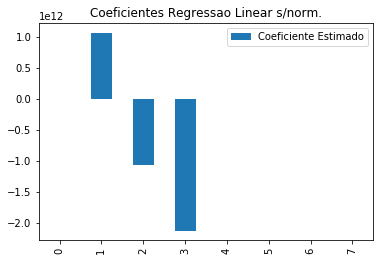

In [19]:
## visualizando coeficientes do modelo
coef = pd.DataFrame(X_train.columns)
coef['Coeficiente Estimado'] = pd.Series(lnr.coef_[0])
print(coef)
coef.plot(kind='bar', title='Coeficientes Regressao Linear s/norm.', sort_columns = False)
plt.show()

O eixo X representa os atributos X1 a X8. As barras representam os valores para os coeficientes estimados.  

In [20]:
# Cria um modelo de regressão linear com dados normalizados

lnr = LinearRegression(normalize=True).fit(X_train, y_train)

y_pred = lnr.predict(X_test)

print('Modelo Regressao Linear (dados normalizados):')
print("Acurácia da base de treinamento: {:.2f}".format(lnr.score(X_train, y_train)))
print("Acurácia da base de testes: {:.2f}".format(lnr.score(X_test, y_test)))
print("w[0]: ",  lnr.coef_[0])
print("b: " , lnr.intercept_)
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))

Modelo Regressao Linear (dados normalizados):
Acurácia da base de treinamento: 0.92
Acurácia da base de testes: 0.89
w[0]:  [-6.24330866e+01 -4.19498961e-02  1.79741675e-02 -8.83694775e-02
  4.07387719e+00 -3.09884079e-02  1.95457977e+01  1.89320076e-01]
b:  [81.64889581]
r2:  0.8949
MSE:  12.515


In [21]:
# Regularização e feature selection - Ridge

ridge = Ridge(alpha=1).fit(X_train, y_train)
y_pred = ridge.predict(X_test)

print('Modelo Regressao Linear Ridge (dados nao normalizados):')
print("Acurácia da base de treinamento: {:.2f}".format(ridge.score(X_train, y_train)))
print("Acurácia da base de testes: {:.2f}".format(ridge.score(X_test, y_test)))
print()
print("Ridge: w: {}  b: {}".format(ridge.coef_, ridge.intercept_))
print("Número de atributos usados: {}".format(np.sum(ridge.coef_ != 0)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))

Modelo Regressao Linear Ridge (dados nao normalizados):
Acurácia da base de treinamento: 0.91
Acurácia da base de testes: 0.89

Ridge: w: [[-4.39160625e+00  1.07517962e-02  3.59739187e-02 -1.26110611e-02
   5.22459796e+00 -2.09316944e-02  1.80614014e+01  2.14682636e-01]]  b: [-23.01700357]
Número de atributos usados: 8
r2:  0.8877
MSE:  13.3827


In [22]:
# Regularização e feature selection - Lasso (Least Absolute Shrinkage Selector Operator)

lasso = Lasso(alpha=1).fit(X_train, y_train)
y_pred = lasso.predict(X_test)

print('Modelo Regressao Linear Lasso (dados nao normalizados):')
print("Acurácia da base de treinamento: {:.2f}".format(lasso.score(X_train, y_train)))
print("Acurácia da base de testes: {:.2f}".format(lasso.score(X_test, y_test)))
print()
print("Lasso: w: {}  b: {}".format(lasso.coef_, lasso.intercept_))
print("Número de atributos usados: {}".format(np.sum(lasso.coef_ != 0)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))

Modelo Regressao Linear Lasso (dados nao normalizados):
Acurácia da base de treinamento: 0.80
Acurácia da base de testes: 0.74

Lasso: w: [-0.         -0.07680963  0.12619895 -0.02368391  0.          0.
  0.          0.13856557]  b: [37.47483674]
Número de atributos usados: 4
r2:  0.7378
MSE:  31.2327


In [23]:
# Regularização e feature selection - Ridge - Ajuste de hiperparametros - sem normalizacao

ridge = Ridge().fit(X_train, y_train) #default alpha = 1
y_pred = ridge.predict(X_test)
print("Ridge 1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge.score(X_test, y_test)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))
print("Número de atributos usados: {}".format(np.sum(ridge.coef_ != 0)))
print()


ridge10 = Ridge(alpha=10).fit(X_train, y_train)
y_pred = ridge10.predict(X_test)
print("Ridge 10")
print("Acurácia na base de treinamento: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge10.score(X_test, y_test)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))
print("Número de atributos usados: {}".format(np.sum(ridge.coef_ != 0)))
print()

ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
y_pred = ridge01.predict(X_test)
print("Ridge .1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge01.score(X_test, y_test)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))
print("Número de atributos usados: {}".format(np.sum(ridge.coef_ != 0)))

Ridge 1
Acurácia na base de treinamento: 0.91
Acurácia na base de teste: 0.89
r2:  0.8877
MSE:  13.3827
Número de atributos usados: 8

Ridge 10
Acurácia na base de treinamento: 0.90
Acurácia na base de teste: 0.87
r2:  0.8665
MSE:  15.9033
Número de atributos usados: 8

Ridge .1
Acurácia na base de treinamento: 0.92
Acurácia na base de teste: 0.89
r2:  0.8921
MSE:  12.8475
Número de atributos usados: 8


In [24]:
# Regularização e feature selection - Ridge - Ajuste de hiperparametros - com normalizacao

ridge = Ridge(normalize=True).fit(X_train, y_train) #default alpha = 1
y_pred = ridge.predict(X_test)
print("Ridge 1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge.score(X_test, y_test)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))
print("Número de atributos usados: {}".format(np.sum(ridge.coef_ != 0)))
print()


ridge10 = Ridge(alpha=10, normalize=True).fit(X_train, y_train)
y_pred = ridge10.predict(X_test)
print("Ridge 10")
print("Acurácia na base de treinamento: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge10.score(X_test, y_test)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))
print("Número de atributos usados: {}".format(np.sum(ridge.coef_ != 0)))
print()

ridge01 = Ridge(alpha=0.1, normalize=True).fit(X_train, y_train)
y_pred = ridge01.predict(X_test)
print("Ridge .1")
print("Acurácia na base de treinamento: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge01.score(X_test, y_test)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))
print("Número de atributos usados: {}".format(np.sum(ridge.coef_ != 0)))

Ridge 1
Acurácia na base de treinamento: 0.81
Acurácia na base de teste: 0.75
r2:  0.7485
MSE:  29.9555
Número de atributos usados: 8

Ridge 10
Acurácia na base de treinamento: 0.35
Acurácia na base de teste: 0.31
r2:  0.312
MSE:  81.9545
Número de atributos usados: 8

Ridge .1
Acurácia na base de treinamento: 0.90
Acurácia na base de teste: 0.86
r2:  0.8608
MSE:  16.5792
Número de atributos usados: 8


In [25]:
# Regularização e feature selection - Lasso - Ajuste de hiperparametros - sem normalizacao

lasso = Lasso().fit(X_train, y_train) #default alpha = 1
y_pred = lasso.predict(X_test)
print("Lasso 1")
print("Acurácia na base de treinamento: {:.2f}".format(lasso.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso.score(X_test, y_test)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))
print("Número de atributos usados: {}".format(np.sum(lasso.coef_ != 0)))
print()

lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
y_pred = lasso001.predict(X_test)
print("Lasso .01")
print("Acurácia na base de treinamento: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso001.score(X_test, y_test)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))
print("Número de atributos usados: {}".format(np.sum(lasso001.coef_ != 0)))
print()

lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
y_pred = lasso00001
print("Lasso .0001")
print("Acurácia na base de treinamento: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso00001.score(X_test, y_test)))
#print('r2: ', round(r2_score(y_test, y_pred),4))
#print("MSE: ", round(mean_squared_error(y_test, y_pred),4))
print("Número de atributos usados: {}".format(np.sum(lasso00001.coef_ != 0)))

Lasso 1
Acurácia na base de treinamento: 0.80
Acurácia na base de teste: 0.74
r2:  0.7378
MSE:  31.2327
Número de atributos usados: 4

Lasso .01
Acurácia na base de treinamento: 0.91
Acurácia na base de teste: 0.89
r2:  0.8881
MSE:  13.3344
Número de atributos usados: 7

Lasso .0001
Acurácia na base de treinamento: 0.92
Acurácia na base de teste: 0.89
Número de atributos usados: 8


In [26]:
# Regularização e feature selection - Lasso - Ajuste de hiperparametros - com normalizacao

lasso = Lasso(normalize=True).fit(X_train, y_train) #default alpha = 1
y_pred = lasso.predict(X_test)
print("Lasso 1")
print("Acurácia na base de treinamento: {:.2f}".format(lasso.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso.score(X_test, y_test)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))
print("Número de atributos usados: {}".format(np.sum(lasso.coef_ != 0)))
print()

lasso001 = Lasso(alpha=0.01, max_iter=100000, normalize=True).fit(X_train, y_train)
y_pred = lasso001.predict(X_test)
print("Lasso .01")
print("Acurácia na base de treinamento: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso001.score(X_test, y_test)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))
print("Número de atributos usados: {}".format(np.sum(lasso001.coef_ != 0)))
print()

lasso00001 = Lasso(alpha=0.0001, max_iter=100000, normalize=True).fit(X_train, y_train)
y_pred = lasso00001
print("Lasso .0001")
print("Acurácia na base de treinamento: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso00001.score(X_test, y_test)))
#print('r2: ', round(r2_score(y_test, y_pred),4))
#print("MSE: ", round(mean_squared_error(y_test, y_pred),4))
print("Número de atributos usados: {}".format(np.sum(lasso00001.coef_ != 0)))

Lasso 1
Acurácia na base de treinamento: 0.00
Acurácia na base de teste: -0.00
r2:  -0.0002
MSE:  119.1399
Número de atributos usados: 0

Lasso .01
Acurácia na base de treinamento: 0.91
Acurácia na base de teste: 0.88
r2:  0.879
MSE:  14.4168
Número de atributos usados: 4

Lasso .0001
Acurácia na base de treinamento: 0.92
Acurácia na base de teste: 0.89
Número de atributos usados: 7


In [27]:
# Ajuste de hiperparametros Ridge sem normalizacao dos dados - busca do melhor alpha

ridge_cv = RidgeCV(alphas=(0.1, 1.0, 10.0), normalize=False, store_cv_values=True).fit(X_train, y_train)
y_pred = ridge_cv.predict(X_test)

print("Acurácia na base de treinamento: {:.2f}".format(ridge_cv.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge_cv.score(X_test, y_test)))
print()
print("Os melhores parâmetros encontrados:")
print(ridge_cv.cv_values_,'\n')
print(ridge_cv.alpha_,'\n')
print("Número de atributos usados: {}".format(np.sum(ridge_cv.coef_ != 0)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))

Acurácia na base de treinamento: 0.92
Acurácia na base de teste: 0.89

Os melhores parâmetros encontrados:
[[[3.35760604e+01 3.37897277e+01 3.41724218e+01]]

 [[5.86586220e-01 3.92253769e-01 1.62400775e+00]]

 [[1.49790062e-02 1.70642506e-01 3.73675064e+00]]

 ...

 [[1.95606145e+00 2.49980370e+00 7.32475979e+00]]

 [[8.41326632e-04 2.99788275e-01 4.07853624e+00]]

 [[3.10948853e+01 2.82192759e+01 1.55906803e+01]]] 

0.1 

Número de atributos usados: 8
r2:  0.8921
MSE:  12.8475


    0  Coeficiente Estimado
0  X1            -26.505430
1  X2             -0.016472
2  X3              0.036271
3  X4             -0.026372
4  X5              4.808607
5  X6             -0.026487
6  X7             19.422349
7  X8              0.189966


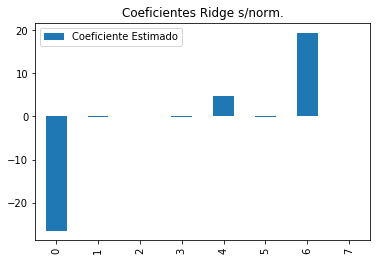

In [28]:
# visualizando coeficientes do modelo
coef = pd.DataFrame(X_train.columns)
coef['Coeficiente Estimado'] = pd.Series(ridge_cv.coef_[0])
print(coef)
coef.plot(kind='bar', title='Coeficientes Ridge s/norm.', sort_columns = False)
plt.show()

In [29]:
# Ajuste de hiperparametros Ridge com normalizacao dos dados - busca do melhor alpha

ridge_cv = RidgeCV(alphas=(0.1, 1.0, 10.0), normalize=True, store_cv_values=True).fit(X_train, y_train)
y_pred = ridge_cv.predict(X_test)

print("Acurácia na base de treinamento: {:.2f}".format(ridge_cv.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(ridge_cv.score(X_test, y_test)))
print()
print("Os melhores parâmetros encontrados:")
print(ridge_cv.cv_values_,'\n')
print(ridge_cv.alpha_,'\n')
print("Número de atributos usados: {}".format(np.sum(ridge_cv.coef_ != 0)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))

Acurácia na base de treinamento: 0.90
Acurácia na base de teste: 0.86

Os melhores parâmetros encontrados:
[[[6.00487809e+01 1.09798561e+02 2.14220768e+02]]

 [[1.38052556e+00 1.27768495e-01 4.98556700e+01]]

 [[6.43289712e-02 2.92987336e+00 3.39935258e+01]]

 ...

 [[1.13604152e+00 1.34951896e+01 9.60002505e+01]]

 [[1.00358072e-02 2.73132564e+00 3.34368572e+01]]

 [[1.21569641e+01 1.15170338e-02 2.17744426e+01]]] 

0.1 

Número de atributos usados: 8
r2:  0.8608
MSE:  16.5792


In [30]:
# Ajuste de hiperparametros Lasso sem normalizacao dos dados - busca do melhor alpha

lasso_cv = LassoCV(normalize=False, cv=5, random_state=0).fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)

print("Acurácia na base de treinamento: {:.2f}".format(lasso_cv.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso_cv.score(X_test, y_test)))
print()
print("Os melhores parâmetros encontrados:")
print(round(lasso_cv.alpha_,4),'\n')
print(lasso_cv.alphas_,'\n')
print("Número de atributos usados: {}".format(np.sum(lasso_cv.coef_ != 0)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))

C:\Users\Rejane\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia na base de treinamento: 0.83
Acurácia na base de teste: 0.78

Os melhores parâmetros encontrados:
0.5842 

[584.1846422  544.81255251 508.0940099  473.85017416 441.91425835
 412.13071637 384.35448544 358.45027951 334.29193036 311.76177309
 290.75007302 271.1544912  252.87958602 235.83634828 219.94176772
 205.1184287  191.29413311 178.40154878 166.37788148 155.16456911
 144.70699647 134.95422923 125.85876585 117.37630627 109.46553607
 102.08792531  95.20754082  88.79087122  82.80666367  77.22577168
  72.02101314  67.1670379   62.64020434  58.41846422  54.48125525
  50.80940099  47.38501742  44.19142583  41.21307164  38.43544854
  35.84502795  33.42919304  31.17617731  29.0750073   27.11544912
  25.2879586   23.58363483  21.99417677  20.51184287  19.12941331
  17.84015488  16.63778815  15.51645691  14.47069965  13.49542292
  12.58587659  11.73763063  10.94655361  10.20879253   9.52075408
   8.87908712   8.28066637   7.72257717   7.20210131   6.71670379
   6.26402043   5.84184642

    0  Coeficiente Estimado
0  X1                  -0.0
1  X2                   NaN
2  X3                   NaN
3  X4                   NaN
4  X5                   NaN
5  X6                   NaN
6  X7                   NaN
7  X8                   NaN


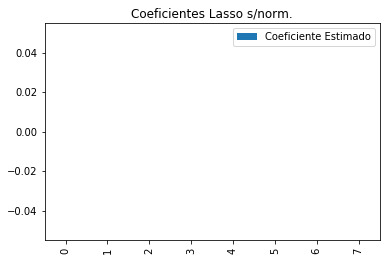

In [31]:
# visualizando coeficientes do modelo
coef = pd.DataFrame(X_train.columns)
coef['Coeficiente Estimado'] = pd.Series(lasso_cv.coef_[0])
print(coef)
coef.plot(kind='bar', title='Coeficientes Lasso s/norm.', sort_columns = False)
plt.show()

In [32]:
# Ajuste de hiperparametros Lasso com normalizacao dos dados - busca do melhor alpha

lasso_cv = LassoCV(normalize=True, cv=5, random_state=0).fit(X_train, y_train)
y_pred = lasso_cv.predict(X_test)

print("Acurácia na base de treinamento: {:.2f}".format(lasso_cv.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso_cv.score(X_test, y_test)))
print()
print("Os melhores parâmetros encontrados:")
print(round(lasso_cv.alpha_,4),'\n')
print(lasso_cv.alphas_,'\n')
print("Número de atributos usados: {}".format(np.sum(lasso_cv.coef_ != 0)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))

Acurácia na base de treinamento: 0.92
Acurácia na base de teste: 0.89

Os melhores parâmetros encontrados:
0.0003 

[0.33883622 0.31599979 0.29470246 0.2748405  0.25631717 0.23904225
 0.22293161 0.20790676 0.19389454 0.1808267  0.16863958 0.15727384
 0.14667411 0.13678877 0.12756966 0.11897189 0.11095359 0.10347569
 0.09650177 0.08999787 0.08393232 0.07827556 0.07300005 0.06808009
 0.06349172 0.05921259 0.05522186 0.05150009 0.04802916 0.04479215
 0.04177331 0.03895793 0.0363323  0.03388362 0.03159998 0.02947025
 0.02748405 0.02563172 0.02390423 0.02229316 0.02079068 0.01938945
 0.01808267 0.01686396 0.01572738 0.01466741 0.01367888 0.01275697
 0.01189719 0.01109536 0.01034757 0.00965018 0.00899979 0.00839323
 0.00782756 0.00730001 0.00680801 0.00634917 0.00592126 0.00552219
 0.00515001 0.00480292 0.00447922 0.00417733 0.00389579 0.00363323
 0.00338836 0.00316    0.00294702 0.00274841 0.00256317 0.00239042
 0.00222932 0.00207907 0.00193895 0.00180827 0.0016864  0.00157274
 0.00146674 0

C:\Users\Rejane\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


    0  Coeficiente Estimado
0  X1            -48.600249
1  X2                   NaN
2  X3                   NaN
3  X4                   NaN
4  X5                   NaN
5  X6                   NaN
6  X7                   NaN
7  X8                   NaN


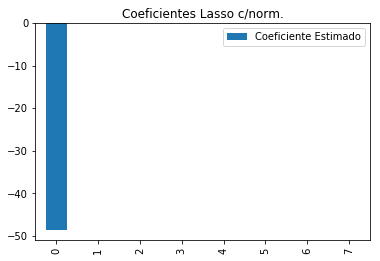

In [33]:
# visualizando coeficientes do modelo
coef = pd.DataFrame(X_train.columns)
coef['Coeficiente Estimado'] = pd.Series(lasso_cv.coef_[0])
print(coef)
coef.plot(kind='bar', title='Coeficientes Lasso c/norm.', sort_columns = False)
plt.show()

In [34]:
# Um modelo ensemble

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,'learning_rate': 0.01, 'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params).fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Acurácia na base de treinamento: {:.2f}".format(reg.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(reg.score(X_test, y_test)))
print('r2: ', round(r2_score(y_test, y_pred),4))
print("MSE: ", round(mean_squared_error(y_test, y_pred),4))
print("Número de atributos usados: {}".format(np.sum(reg.feature_importances_ != 0)))

C:\Users\Rejane\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Acurácia na base de treinamento: 1.00
Acurácia na base de teste: 1.00
r2:  0.9968
MSE:  0.3845
Número de atributos usados: 8


    0  Coeficiente Estimado
0  X1              0.284475
1  X2              0.240971
2  X3              0.076953
3  X4              0.111619
4  X5              0.115694
5  X6              0.006661
6  X7              0.126104
7  X8              0.037523


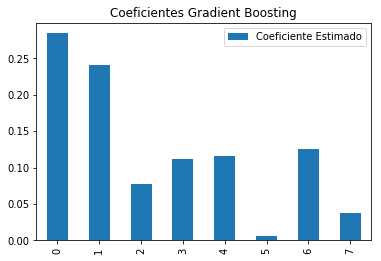

In [35]:
# visualizando coeficientes do modelo
coef = pd.DataFrame(X_train.columns)
coef['Coeficiente Estimado'] = pd.Series(reg.feature_importances_)
print(coef)
coef.plot(kind='bar', title='Coeficientes Gradient Boosting', sort_columns = False)
plt.show()

Na figura acima, o eixo X representa os atributos X1 a X8, e as barras representam a importância dos atributos (‘Feature Importance’), e não é possível comparar seus valores absolutos com os outros gráficos.   

Com base nas métricas de avaliação, observa-se que os modelos de Regressão Linear, Ridge e Lasso apresentaram desempenho inferior aos modelos KNN e Gradient Boosting (ensemble), com valores de r2 menores e erro quadrático médio (MSE) superiores. O melhor modelo, segundo as duas métricas, é o Gradient Boosting, testado aqui apenas para dados não-normalizados.  

Para os modelos de Regressão Linear, Lasso e Ridge, ao contrário do esperado, a opção de trabalhar com dados normalizados não se mostrou vantajosa, pois as métricas de avaliação nestes casos apresentaram valores piores (MSE maiores, r2 menores). No caso do modelo Lasso com α = 1, o algoritmo nem mesmo consegue calcular os coeficientes, no caso de dados normalizados. No caso de Lasso com α = 0.0001, provavelmente alguma divisão por zero impede o cálculo das métricas r2 e MSE.

Pode-se observar uma grande discrepância entre os coeficientes estimados pelos modelos. Apenas o atributo X1 (compactação do edifício) é que aparece como o atributo com maior importância para todos os modelos. No caso do modelo Lasso (com o melhor α estimado), X1 tem tanto peso que somente este atributo é representado.  

A área envidraçada (X7) aparece como o segundo atributo mais importante nos modelos de Regressão Linear e Ridge, mas em quarto lugar para o melhor modelo (Gradient Boosting). No estudo original de Tsanas e Xifara (2012), este foi o atributo mais importante, o que é intuitivo do ponto de vista dos princípios de construção de edificações, e os autores destacam que curiosamente a estatística descritiva não descreve uma correlação forte entre a área envidraçada e as variáveis resposta (o que também foi observado neste trabalho, embora a correlação calculada pelos autores tenha sido a de Spearman, enquanto aqui foi calculada a correlação de Pearson). Os autores empregam um algoritmo baseado em Random Forests, que segundo eles, consegue alcançar melhores resultados do que os algoritmos de regressão linear, ainda que estes sejam a opção mais óbvia por se tratar de dados de variáveis resposta númericas contínuas. Fato semelhante também foi observado neste trabalho, uma vez que os algoritmos de regressão linear, nem mesmo com regularização (Ridge e Lasso), mostraram resultados superiores.

## Conclusão

Este trabalho teve o objetivo de aplicar os conhecimentos acerca de técnicas de Machine Learning, com a utilização de modelos sobre uma base de dados escolhida, no caso sobre eficiência energética em edificações em função dos atributos de construção.
A ferramenta utilizada (Python e suas bibliotecas Pandas e SciKit Learn) mostrou-se adequada ao propósito do projeto, possibilitando a coleta e tratamento dos dados, visualizações, e construção de modelos de regressão para previsão, além da utilização de métricas para avaliação dos modelos.  

Não houve grandes dificuldades para o desenvolvimento deste projeto, pois o conjunto de dados é bastante limpo, sem outliers ou dados de má qualidade. No entanto, pode ser aperfeiçoado o pipeline para geração e comparação dos modelos, de modo a tornar o código menos repetitivo.  

Com relação ao método escolhido, conclui-se que a aplicação de Regressão Linear para dados de experimentos planejados (em que os atributos não seguem uma distribuição gaussiana) pode não levar a resultados tão robustos, ainda que o método de regressão seja a primeira opção por se tratar de um caso de variáveis resposta contínuas. O modelo Gradient Boosting mostrou-se como melhor alternativa.

### Referências  

TSANAS, A. ,XIFARA, A.: 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools', Energy and Buildings, Vol. 49, pp. 560-567, 2012. http://people.maths.ox.ac.uk/tsanas/Preprints/ENB2012.pdf  

Energy efficiency Data Set. https://archive.ics.uci.edu/ml/datasets/Energy+efficiency
